# Big Mart Sales - Hypothesis Testing

In [183]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [138]:
# Import Train Dataset
df_train = pd.read_csv("E:\\Pycharm Projects\\Machine_Learning\\GitHub\\Big Mart Sales\\train_v9rqX0R.csv")

# Print df_train
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [139]:
# Import Test Dataset
df_test = pd.read_csv("E:\\Pycharm Projects\\Machine_Learning\\GitHub\\Big Mart Sales\\test_AbJTz2l.csv")

# Print df_test
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [140]:
# Parse first two characters from Item_Identifier column
df_train["Item_Identifier"] = df_train["Item_Identifier"].str[0:2]

# Convert "reg" to "Regular" and "low fat", "LF" to Low Fat
df_train["Item_Fat_Content"] = df_train["Item_Fat_Content"].replace("reg", "Regular")
df_train["Item_Fat_Content"] = df_train["Item_Fat_Content"].replace(["LF", "low fat"], "Low Fat")

In [141]:
# Drop rows with Na's
df_na_dropped = df_train.dropna(axis = 0, how = "any")

# print df_na_dropped
df_na_dropped.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FD,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### *Check Relation Between Item_Identifier and Item_Outlet_Sales (using ANOVA)*


In [142]:
# Filter data with Item_Identifier = "FD"
Item_Identifier_FD = df_na_dropped[df_na_dropped["Item_Identifier"] == "FD"]["Item_Outlet_Sales"]

# Filter data with Item_Identifier = "DR"
Item_Identifier_DR = df_na_dropped[df_na_dropped["Item_Identifier"] == "DR"]["Item_Outlet_Sales"]

# Filter data with Item_Identifier = "NC"
Item_Identifier_NC = df_na_dropped[df_na_dropped["Item_Identifier"] == "NC"]["Item_Outlet_Sales"]

In [143]:
# Import Library for doing ANOVA
from scipy.stats import stats

In [144]:
# Perform ANOVA
# H0: There is no significance relation between Item_Identifier and Item_Outlet_Sales.
# H1: There is significance relation between Item_Identifier and Item_Outlet_Sales.
# Reject H0 if P-value < 0.05
stats.f_oneway(Item_Identifier_FD, Item_Identifier_DR, Item_Identifier_NC)

F_onewayResult(statistic=5.2519081888283505, pvalue=0.005268647663953791)

*p-value < 0.05 so Reject H0*
<br>*So, There is significance relation between Item_Identifier and Item_Outlet_Sales.*

### *Check Relation Between Item_Fat_Content and Item_Outlet_Sales (2 - Sample ttest)*

In [145]:
# Filter data with Item_Fat_Content = "Regular"
Item_Fat_Content_Regular = df_na_dropped[df_na_dropped["Item_Fat_Content"] == "Regular"]["Item_Outlet_Sales"]

# Filter data with Item_Fat_Content = "Low Fat"
Item_Fat_Content_Low_Fat = df_na_dropped[df_na_dropped["Item_Fat_Content"] == "Low Fat"]["Item_Outlet_Sales"]

In [146]:
# Perform 2 - Sample ttest
# H0: There is no significance relation between Item_Fat_Content and Item_Outlet_Sales.
# H1: There is significance relation between Item_Fat_Content and Item_Outlet_Sales.
# Reject H0 if P-value < 0.05
stats.ttest_ind(a = Item_Fat_Content_Regular, b = Item_Fat_Content_Low_Fat)

Ttest_indResult(statistic=0.6031979717004137, pvalue=0.5464064285474939)

*p-value > 0.54, Failed to reject H0*
*<br>So, There is no significance relation between Item_Fat_Content and Item_Outlet_Sales*

### *Check Relation Between Item_Type and Item_Outlet_Sales (using ANOVA)*

In [147]:
# Define a function to filter Item_Type
def filter_item_type(item_type):
    return df_na_dropped[df_na_dropped["Item_Type"] == item_type]["Item_Outlet_Sales"]

In [148]:
# Perform ANOVA
# H0: There is no significance relation between Item_Type and Item_Outlet_Sales.
# H1: There is significance relation between Item_Type and Item_Outlet_Sales.
# Reject H0 if P-value < 0.05
stats.f_oneway(filter_item_type("Fruits and Vegetables"), filter_item_type("Snack Foods"), filter_item_type("Household"), filter_item_type("Frozen Foods"),
               filter_item_type("Dairy"), filter_item_type("Canned"), filter_item_type("Baking Goods"), filter_item_type("Health and Hygiene"),
               filter_item_type("Soft Drinks"), filter_item_type("Meat"), filter_item_type("Breads"), filter_item_type("Hard Drinks"),
               filter_item_type("Others"), filter_item_type("Starchy Foods"), filter_item_type("Breakfast"), filter_item_type("Seafood"))

F_onewayResult(statistic=2.129833017616511, pvalue=0.0066794504555212665)

*p-value < 0.05, Reject H0*
<br>*So, There is significance relation between Item_Type and Item_Outlet_Sales*

### *Check Relation Between Outlet_Identifier and Item_Outlet_Sales (using ANOVA)*

In [149]:
# Define a funtion to filter the Outler_Identifier
def filter_Outlet_Identifier(outlet_identifier):
    return df_train[df_train["Outlet_Identifier"] == outlet_identifier]["Item_Outlet_Sales"].dropna().to_list()

In [150]:
# Take filtered sales in list
outlet_identifier_sales = [filter_Outlet_Identifier(outlet_identifier) for outlet_identifier in df_train["Outlet_Identifier"].unique()]

In [151]:
# Perform ANOVA
# H0: There is no significance relation between Item_Identifier and Item_Outlet_Sales.
# H1: There is significance relation between Item_Identifier and Item_Outlet_Sales.
# Reject H0 if P-value < 0.05
stats.f_oneway(outlet_identifier_sales[0], outlet_identifier_sales[1], outlet_identifier_sales[2], outlet_identifier_sales[3], outlet_identifier_sales[4],
               outlet_identifier_sales[5], outlet_identifier_sales[6], outlet_identifier_sales[7], outlet_identifier_sales[8], outlet_identifier_sales[9])

F_onewayResult(statistic=300.0791353284904, pvalue=0.0)

*p-value < 0.05, Reject H0*
<br>*So, There is significance relation between Item_Identifier and Item_Outlet_Sales.*

### *Check Relation Between Outlet_Size and Item_Outlet_Sales (using ANOVA)*

In [152]:
# Define a funtion to filter the Outler_Identifier
def filter_Outlet_Size(outlet_size):
    return df_train[df_train["Outlet_Size"] == outlet_size]["Item_Outlet_Sales"].dropna()

In [153]:
# Perform ANOVA
# H0: There is no significance relation between Outlet_Size and Item_Outlet_Sales.
# H1: There is significance relation between Outlet_Size and Item_Outlet_Sales.
# Reject H0 if P-value < 0.05
stats.f_oneway(filter_Outlet_Size("Medium"), filter_Outlet_Size("High"), filter_Outlet_Size("Small"))

F_onewayResult(statistic=131.09669439861293, pvalue=1.7912745521017898e-56)

*p-value < 0.05, Reject H0*
*<br>So, There is significance relation between Outlet_Size and Item_Outlet_Sales.*

### *Check Relation Between Outlet_Location_Type and Item_Outlet_Sales (using ANOVA)*

In [154]:
# Define a funtion to filter the Outler_Identifier
def filter_Outlet_Location_Type(outlet_location_type):
    return df_train[df_train["Outlet_Location_Type"] == outlet_location_type]["Item_Outlet_Sales"].dropna()

In [155]:
# Perform ANOVA
# H0: There is no significance relation between Outlet_Location_Type and Item_Outlet_Sales.
# H1: There is significance relation between Outlet_Location_Type and Item_Outlet_Sales.
# Reject H0 if P-value < 0.05
stats.f_oneway(filter_Outlet_Location_Type("Tier 1"), filter_Outlet_Location_Type("Tier 2"), filter_Outlet_Location_Type("Tier 3"))

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

*p-value < 0.05, Reject H0*
<br>*So, There is significance relation between Outlet_Location_Type and Item_Outlet_Sales.*

### *Check Relation Between Outlet_Type and Item_Outlet_Sales (using ANOVA)*

In [156]:
# Define a funtion to filter the Outlet_Type
def filter_Outlet_Type(outlet_type):
    return df_train[df_train["Outlet_Type"] == outlet_type]["Item_Outlet_Sales"].dropna()

In [157]:
# Perform ANOVA
# H0: There is no significance relation between Outlet_Type and Item_Outlet_Sales.
# H1: There is significance relation between Outlet_Type and Item_Outlet_Sales.
# Reject H0 if P-value < 0.05
stats.f_oneway(filter_Outlet_Type("Supermarket Type1"), filter_Outlet_Type("Supermarket Type2"), filter_Outlet_Type("Supermarket Type3"), filter_Outlet_Type("Grocery Store"))

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

*p-value < 0.05, Reject H0*
<br>*So, There is significance relation between Outlet_Type and Item_Outlet_Sales*

## Data Preprocessing:

In [158]:
# Drop Item_Fat_Content Column as it has no statistical significance
df_train = df_train.drop(columns = ["Item_Fat_Content"])

# Print df_train
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


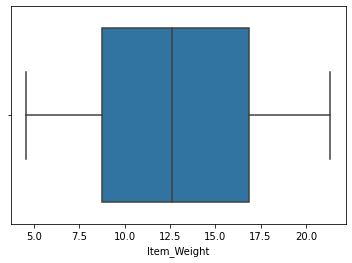

In [159]:
# Check for Outliers in Item_Weight Column
sns.boxplot(x = df_train["Item_Weight"])
plt.show()

No outliers in Item_Weight Column

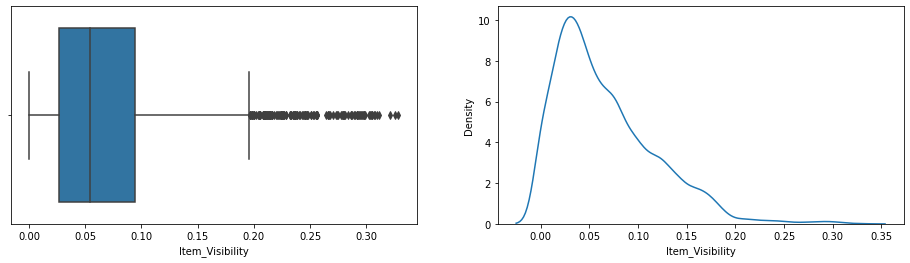

In [160]:
# Check for Outliers in Item_Visibility Column
plt.figure(figsize = (16,4))
plt.subplot(121)
sns.boxplot(x = df_train["Item_Visibility"])

plt.subplot(122)
sns.kdeplot(x = df_train["Item_Visibility"])
plt.show()

*There are outliers in Item_Visibility column*

In [161]:
# Make outliers as Null values so that we can impute them with median
limit_to_make_nan = df_train["Item_Visibility"].std()*3 # 3 Standard deviations from mean
df_train["Item_Visibility"] = np.where(df_train["Item_Visibility"] > limit_to_make_nan, np.nan, df_train["Item_Visibility"])

# Replace zeroes also as Null values
df_train["Item_Visibility"] = np.where(df_train["Item_Visibility"] == 0, np.nan, df_train["Item_Visibility"])

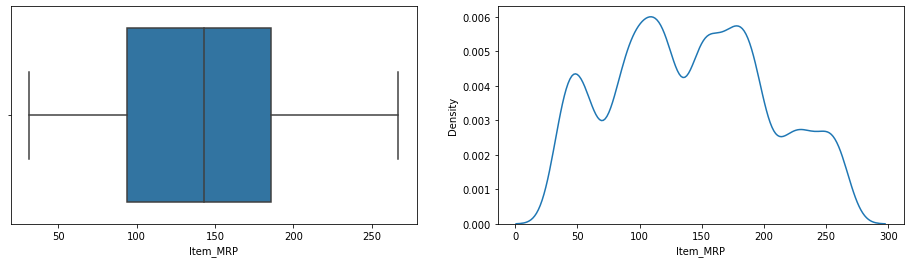

In [162]:
# Check for Outliers in Item_MRP Column
plt.figure(figsize = (16,4))
plt.subplot(121)
sns.boxplot(x = df_train["Item_MRP"])

plt.subplot(122)
sns.kdeplot(x = df_train["Item_MRP"])
plt.show()

*No Outliers in Item_MRP.*

In [163]:
# Check for Null values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Visibility              1105
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [164]:
# Fill Item_Weight with Mean
df_train["Item_Weight"] = df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean())

# Fill Item_Visibility with Median
df_train["Item_Visibility"] = df_train["Item_Visibility"].fillna(df_train["Item_Visibility"].median())

# Fill Outlet_Size with word "Missing"
df_train["Outlet_Size"] = df_train["Outlet_Size"].fillna("Missing")

In [166]:
# One Hot Encoding
df_train = pd.get_dummies(df_train, drop_first = True)

In [167]:
# Print df_train
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,19.20,0.053540,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.053540,53.8614,1987,994.7052,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [168]:
# Split data into Dependent and Independent
X = df_train.drop(columns = ["Item_Outlet_Sales"]).copy()
y = df_train["Item_Outlet_Sales"].copy()

In [170]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 1)

In [171]:
# Print X_train
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_FD,Item_Identifier_NC,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8396,8.85,0.112893,123.3388,2002,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4581,12.30,0.009464,73.8380,2007,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1817,10.80,0.082534,191.1504,2004,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
1600,13.00,0.070444,63.4484,2002,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3786,12.30,0.106929,173.7396,2007,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [172]:
# Print y_train
y_train.head()

8396    2972.1312
4581    1245.0460
1817    4410.2592
1600    1043.9744
3786    3663.2316
Name: Item_Outlet_Sales, dtype: float64

In [175]:
# Build Decision Tree Model
dtr_model = DecisionTreeRegressor()

# Fit the train data
dtr_model.fit(X_train, y_train)

# Predict with X_test
y_pred = dtr_model.predict(X_test)

# Print RMSE and MAE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 1492.330116792195
MAE: 1040.9842864738077


In [176]:
# Build Random Forest Model
rfr_model = RandomForestRegressor()

# Fit the train data
rfr_model.fit(X_train, y_train)

# Predict with X_test
y_pred = rfr_model.predict(X_test)

# Print RMSE and MAE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 1124.3354624970802
MAE: 787.1576512713057


In [182]:
# Build Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators = 50)

# Fit the train data
gbr_model.fit(X_train, y_train)

# Predict with X_test
y_pred = gbr_model.predict(X_test)

# Print RMSE and MAE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 1060.8734468986743
MAE: 762.0846854067547


In [185]:
# Build XGBoost Model
xgb_model = XGBRegressor()

# Fit the train data
xgb_model.fit(X_train, y_train)

# Predict with X_test
y_pred = xgb_model.predict(X_test)

# Print RMSE and MAE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 1142.284426165589
MAE: 804.0011637874362


In [186]:
# Prepare Test Data for Submitting Predictions

# Drop Item_Fat_Content Column as it has no statistical significance
df_test = df_test.drop(columns = ["Item_Fat_Content"])

# Parse first two characters from Item_Identifier column
df_test["Item_Identifier"] = df_test["Item_Identifier"].str[0:2]

# Make outliers as Null values so that we can impute them with median
df_test["Item_Visibility"] = np.where(df_test["Item_Visibility"] > limit_to_make_nan, np.nan, df_test["Item_Visibility"])

# Replace zeroes also as Null values
df_test["Item_Visibility"] = np.where(df_test["Item_Visibility"] == 0, np.nan, df_test["Item_Visibility"])

# Fill Item_Weight with Mean
df_test["Item_Weight"] = df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean())

# Fill Item_Visibility with Median
df_test["Item_Visibility"] = df_test["Item_Visibility"].fillna(df_test["Item_Visibility"].median())

# Fill Outlet_Size with word "Missing"
df_test["Outlet_Size"] = df_test["Outlet_Size"].fillna("Missing")

In [188]:
# One Hot Encoding
df_test = pd.get_dummies(df_test, drop_first = True)

# Print df_test
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_FD,Item_Identifier_NC,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,1985,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [190]:
# Build Gradient Boost Model
GBR_model = GradientBoostingRegressor()

# Fit the Data
GBR_model.fit(X, y)

# Make Predictions with df_test
predictions = GBR_model.predict(df_test)

In [193]:
# Convert any Negative values into Mean of Predictions
predictions = np.where(predictions < 0, np.mean(predictions), predictions)

In [197]:
# Read Sample Submission File
Submission = pd.read_csv("E:\Pycharm Projects\Machine_Learning\GitHub\Big Mart Sales\sample_submission_2.csv")

# Print Submission
Submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1635.374168
1,FDW14,OUT017,1413.018974
2,NCN55,OUT010,957.321163
3,FDQ58,OUT017,2456.368032
4,FDY38,OUT027,5785.510378


In [199]:
# Update predictions
Submission["Item_Outlet_Sales"] = predictions

# Write Submission to CSV file
Submission.to_csv("BMS_with_hypothesis_testing.csv", index = False)

## Competition Score(RMSE) : 1169.69